In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


In [2]:
from test_main import setup 
from rwtools.nemesis.nemesistool import NemesisInstrument 

binary = os.path.abspath("./simple/simple")
outputfile = "./simple_rw.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: jge 
no latency information found for instruction: retq 


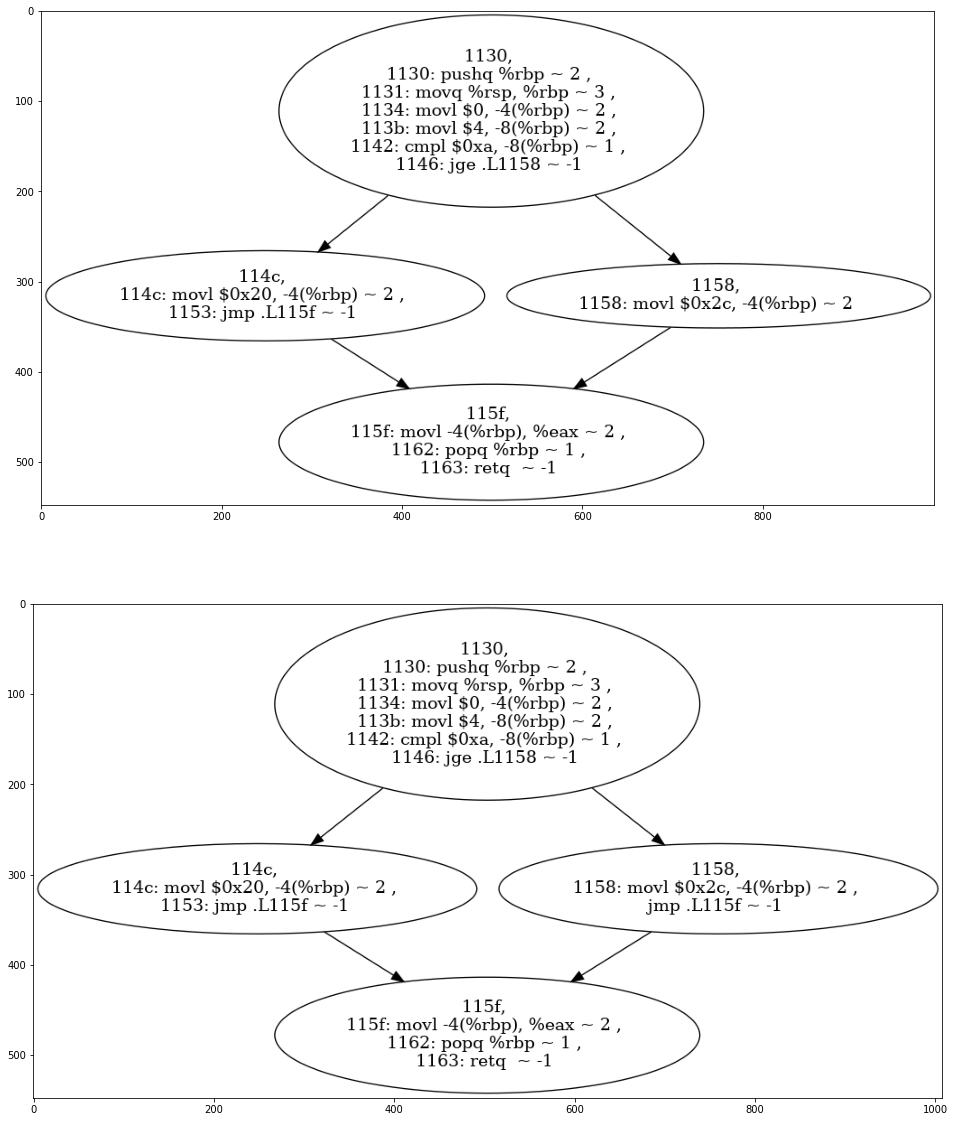

In [3]:
figs, axs = plt.subplots(2, figsize=(20,20))

binary = os.path.abspath("./simple/simple")
outputfile = "./simple_rw.s"

nemesis = NemesisInstrument(binary, outputfile)

axs[0].imshow(nemesis.render_cfg())


target_node = nemesis.cfg.get_node('1130')
nemesis.instrument(target_node)
    
axs[1].imshow(nemesis.render_cfg())

nemesis.dump()

In [6]:
from rwtools.nemesis.latency_map.latency_map import LatencyMapV2 
lat_map = LatencyMapV2(load_latency_map(
            "/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/latency_map"
            "/latencies.p"))

lat_map.get_latency("leaq", "-0xc1(%rbp), %rax")

'0'